C:\Users\mdfai\AppData\Local\Temp\ipykernel_4780\4188353531.py:45: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize((width * scale, height * scale), Image.ANTIALIAS)
C:\Users\mdfai\AppData\Local\Temp\ipykernel_4780\4188353531.py:50: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize((width // scale, height // scale), Image.ANTIALIAS)


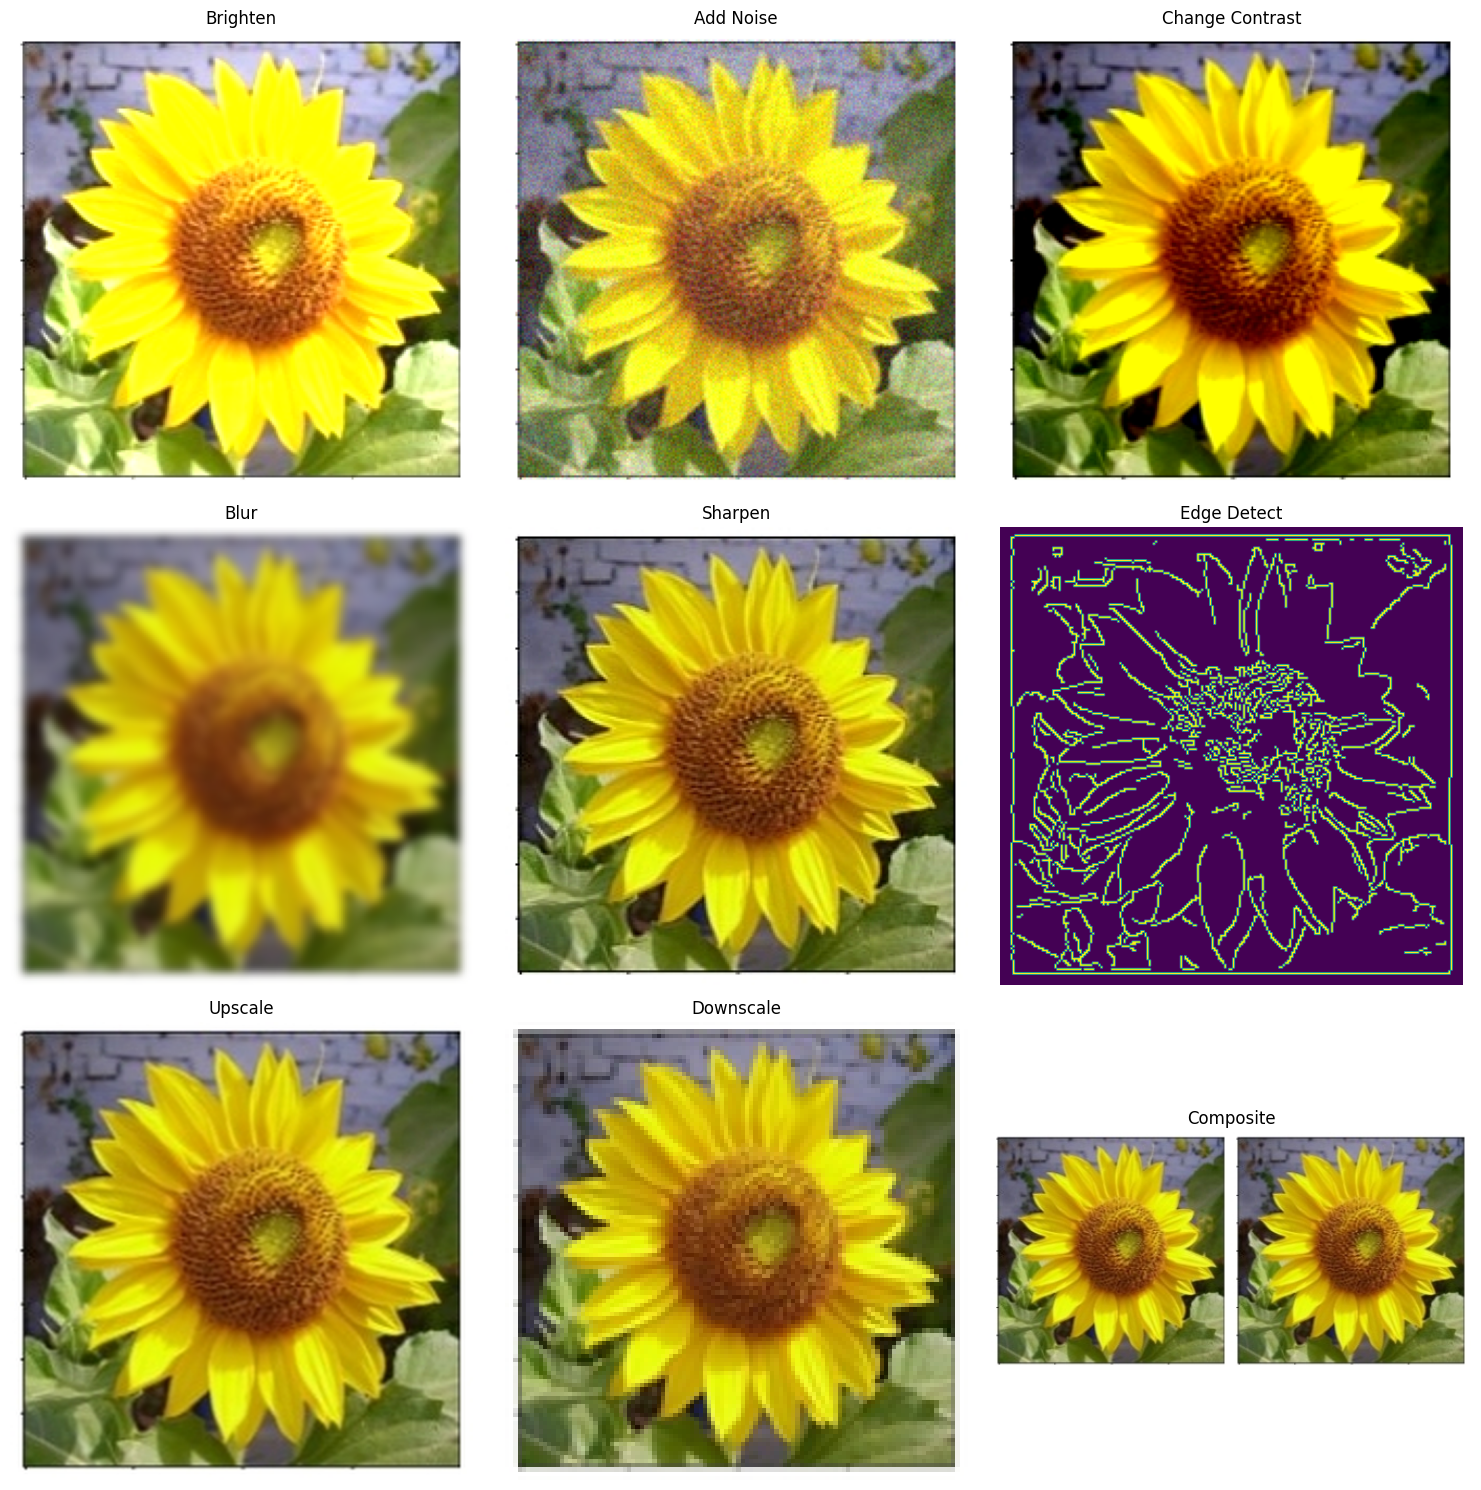

In [1]:
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = 'sunflower.jpeg'
image = Image.open(image_path)

# Brighten the image
def brighten_image(image, factor=1.5):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

# Add noise to the image
def add_noise(image):
    np_image = np.array(image)
    noise = np.random.randint(0, 50, (np_image.shape), dtype='uint8')
    noisy_image = cv2.add(np_image, noise)
    return Image.fromarray(noisy_image)

# Change contrast of the image
def change_contrast(image, factor=1.5):
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(factor)

# Blur the image
def blur_image(image, radius=2):
    return image.filter(ImageFilter.GaussianBlur(radius))

# Sharpen the image
def sharpen_image(image):
    enhancer = ImageEnhance.Sharpness(image)
    return enhancer.enhance(2.0)

# Edge detection
def edge_detect_image(image):
    np_image = np.array(image.convert('L'))
    edges = cv2.Canny(np_image, 100, 200)
    return Image.fromarray(edges)

# Upscale the image
def upscale_image(image, scale=2):
    width, height = image.size
    return image.resize((width * scale, height * scale), Image.ANTIALIAS)

# Downscale the image
def downscale_image(image, scale=2):
    width, height = image.size
    return image.resize((width // scale, height // scale), Image.ANTIALIAS)

# Composite image with itself for demonstration
def composite_image(image):
    width, height = image.size
    composite = Image.new('RGB', (width * 2, height))
    composite.paste(image, (0, 0))
    composite.paste(image, (width, 0))
    return composite

# Apply transformations
bright_image = brighten_image(image)
noisy_image = add_noise(image)
contrast_image = change_contrast(image)
blur_image = blur_image(image)
sharpen_image = sharpen_image(image)
edge_image = edge_detect_image(image)
upscale_image = upscale_image(image)
downscale_image = downscale_image(image)
composite_image = composite_image(image)

# Display images
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
images = [bright_image, noisy_image, contrast_image, blur_image, sharpen_image, edge_image, upscale_image, downscale_image, composite_image]
titles = ["Brighten", "Add Noise", "Change Contrast", "Blur", "Sharpen", "Edge Detect", "Upscale", "Downscale", "Composite"]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
